In [13]:
import pyabc
import matplotlib.pyplot as plt
import numpy as np
import pypesto

h = pyabc.History("sqlite:///h_boehm4.db")

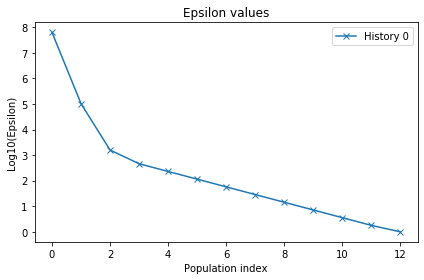

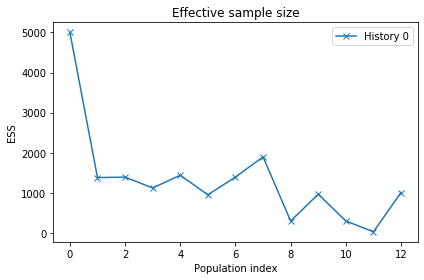

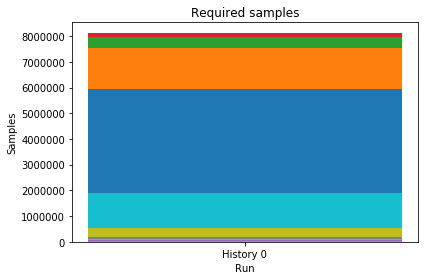

In [14]:
pyabc.visualization.plot_epsilons(h, scale='log10')
pyabc.visualization.plot_effective_sample_sizes(h)
pyabc.visualization.plot_sample_numbers(h)

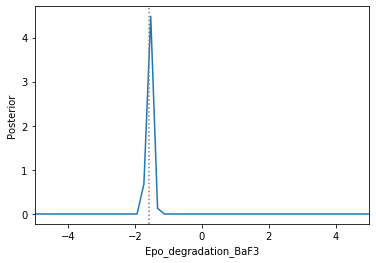

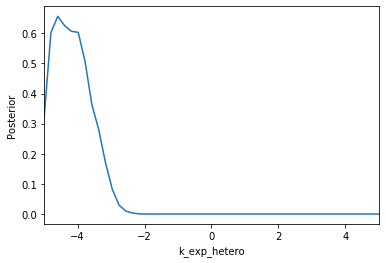

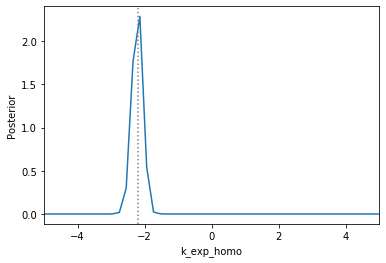

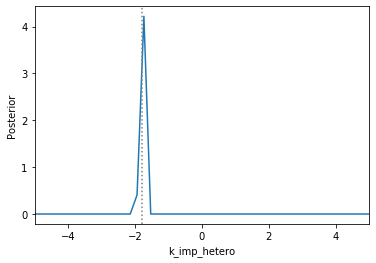

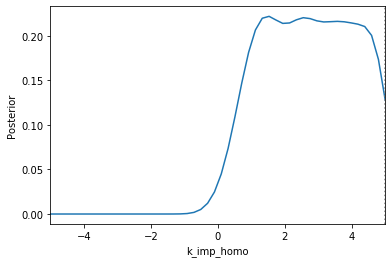

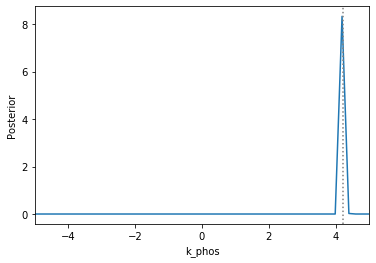

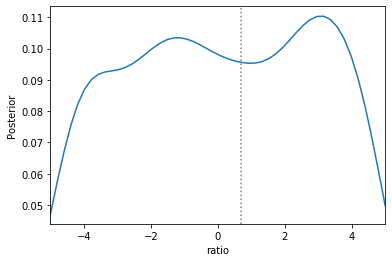

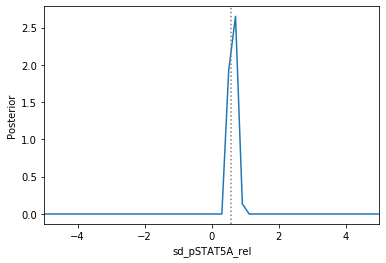

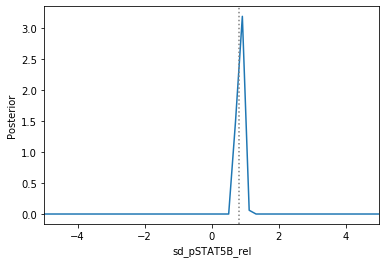

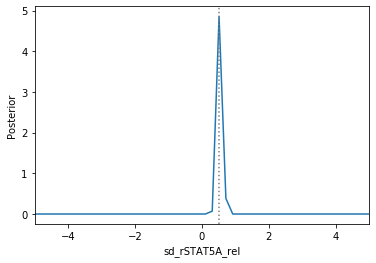

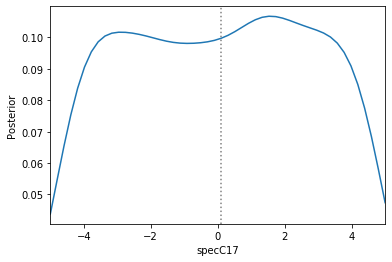

In [15]:
importer = pypesto.PetabImporter.from_folder("/home/yannik/benchmark-models/hackathon_contributions_new_data_format/Boehm_JProteomeRes2014")
problem = importer.petab_problem
parameters = problem.get_optimization_parameters()

refval = {}
lbound = {}
ubound = {}
pdf = problem.parameter_df.reset_index()
for p in parameters:
    refval[p] = float(pdf[pdf['parameterId'] == p]['nominalValue'])
    lbound[p] = float(pdf[pdf['parameterId'] == p]['lowerBound'])
    ubound[p] = float(pdf[pdf['parameterId'] == p]['upperBound'])
for p in parameters:
    pyabc.visualization.plot_kde_1d_highlevel(
        h, x=p, xmin=lbound[p], xmax=ubound[p], refval=refval, refval_color='grey')